In [1]:
!pip install qiskit
!pip install pylatexenc

In [2]:
!pip install qiskit_aer

**Installing dependencies**

In [3]:
from qiskit import transpile, assemble
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT, Diagonal, GroverOperator
from qiskit.quantum_info import DensityMatrix, Statevector
from qiskit.visualization import circuit_drawer, plot_state_city, plot_state_qsphere, plot_bloch_multivector, plot_state_hinton, plot_state_paulivec
import matplotlib.pyplot as plt

**Quantum Counting**

In [12]:
class quantum_count:
    def __init__(self, n_search_qubits, n_counting_qubits, n_iterations):
        self.n_search_qubits = n_search_qubits
        self.n_counting_qubits = n_counting_qubits
        self.n_iterations = n_iterations
        self.qc = self.prepare_circuit()
        self.qc1 = self.prepare_circuit1()
        self.simulator = AerSimulator()
        self.result = None

    def grover_operator(self, n_iterations):
        """Grover iteration circuit for oracle with 5/16 solutions"""
        oracle = Diagonal([1,1,-1,1,1,1,1,-1,1,1,-1,-1,1,1,-1,1])
        grover_it = GroverOperator(oracle).repeat(n_iterations).to_gate()
        grover_it.label = f"Grover^{n_iterations}"
        return grover_it

    def prepare_circuit(self):
        qc = QuantumCircuit(self.n_search_qubits + self.n_counting_qubits, self.n_counting_qubits)
        # Initialize all qubits to |+>
        for qubit in range(self.n_search_qubits + self.n_counting_qubits):
            qc.h(qubit)

        # Begin controlled Grover iterations
        n_iterations = 1
        for qubit in range(self.n_counting_qubits):
            cgrit = self.grover_operator(n_iterations).control()
            qc.append(cgrit, [qubit] + list(range(self.n_counting_qubits, self.n_search_qubits + self.n_counting_qubits)))
            n_iterations *= 2

        # Do inverse QFT on counting qubits
        qft_dagger = QFT(self.n_counting_qubits, inverse=True).to_gate()
        qft_dagger.label = "QFT†"
        qc.append(qft_dagger, range(self.n_counting_qubits))

        # Measure counting qubits
        qc.measure(range(self.n_counting_qubits), range(self.n_counting_qubits))
        return qc

    def prepare_circuit1(self):
        qc1 = QuantumCircuit(self.n_search_qubits + self.n_counting_qubits, self.n_counting_qubits)
        # Initialize all qubits to |+>
        for qubit in range(self.n_search_qubits + self.n_counting_qubits):
            qc1.h(qubit)

        # Begin controlled Grover iterations
        n_iterations = 1
        for qubit in range(self.n_counting_qubits):
            cgrit = self.grover_operator(n_iterations).control()
            qc1.append(cgrit, [qubit] + list(range(self.n_counting_qubits, self.n_search_qubits + self.n_counting_qubits)))
            n_iterations *= 2

        # Do inverse QFT on counting qubits
        qft_dagger = QFT(self.n_counting_qubits, inverse=True).to_gate()
        qft_dagger.label = "QFT†"
        qc1.append(qft_dagger, range(self.n_counting_qubits))
        return qc1

    def run_simulation(self, shots=1024):
        transpiled_qc = transpile(self.qc, self.simulator)
        job = self.simulator.run(transpiled_qc, shots=shots)
        self.result = job.result()

    def run_simulation1(self, shots=1024):
        transpiled_qc = transpile(self.qc1, self.simulator)
        job = self.simulator.run(transpiled_qc, shots=shots)
        self.result = job.result()

    def get_counts(self):
        if self.result:
            counts = self.result.get_counts(self.qc)
            return counts
        else:
            raise RuntimeError("Simulation has not been run yet.")

    def plot_result(self):
        if self.result:
            counts = self.result.get_counts(self.qc)
            fig = plot_histogram(counts)
            plt.close(fig)  # Close the figure after plotting
            return fig
        else:
            raise RuntimeError("Simulation has not been run yet.")

    def psi(self):
        psi = Statevector(self.qc1)  # Ensure correct method for statevector creation
        return psi

    def get_density(self):
        psi = Statevector(self.qc1)
        return DensityMatrix(psi).draw("latex").data

    def get_city(self):
        psi = Statevector(self.qc1)
        fig = plot_state_city(psi)
        plt.close(fig)  # Close the figure after plotting
        return fig

    def get_circuit(self):
        fig = circuit_drawer(self.qc, output='mpl', filename='circuit.png')
        plt.close(fig)  # Close the figure after plotting
        return fig

    def get_hinton(self):
        psi = Statevector(self.qc1)
        fig = plot_state_hinton(psi)
        plt.close(fig)  # Close the figure after plotting
        return fig

    def get_paulivec(self):
        psi = Statevector(self.qc1)
        fig = plot_state_paulivec(psi)
        plt.close(fig)  # Close the figure after plotting
        return fig

    def get_qsphere(self):
        psi = Statevector(self.qc1)
        fig = plot_state_qsphere(psi)
        plt.close(fig)  # Close the figure after plotting
        return fig

    def get_bloch(self):
        psi = Statevector(self.qc1)
        fig = plot_bloch_multivector(psi)
        plt.close(fig)  # Close the figure after plotting
        return fig

**Running simulation with measurement**

In [13]:
simulator = quantum_count(4, 4, 1)
simulator.run_simulation()

**Counts**

In [14]:
simulator.get_counts()

{'1101': 529, '0011': 495}

**Running simuation wihout measurements**

In [15]:
simulator.run_simulation1()

**Density matrix**

In [16]:
from IPython.display import display, Latex
dmatrix=simulator.get_density()
display(Latex(dmatrix))

<IPython.core.display.Latex object>

**Circuit Representation**

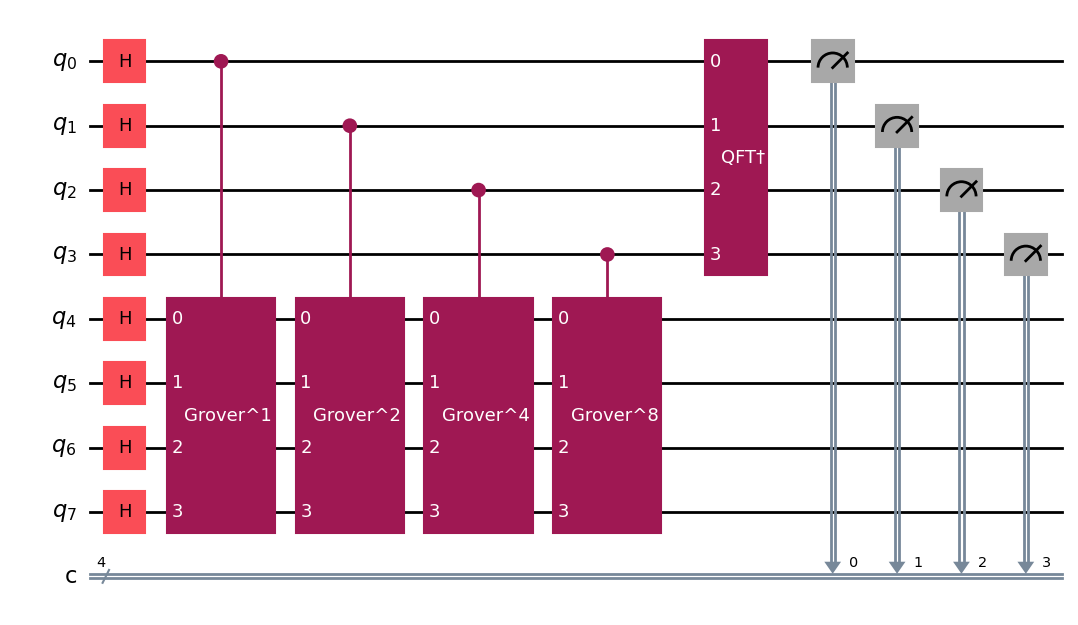

In [18]:
simulator.get_circuit()